In [1]:
##### IMPORT NUMPY #####
import numpy as np

### IMPORT MATPLOT LIB AND SET-UP PLOTTING 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02):
    # set-up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    
    #plot all samples
    X_test, y_test = X[test_idx,:],y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], 
                    alpha=0.8, c=cmap(idx), 
                    marker=markers[idx], label=cl)

    #highlight test samples
        if test_idx:
            X_test, y_test = X[test_idx,:], y[test_idx]
            plt.scatter(X_test[:,0], X_test[:,1], c='',
                        alpha=1.0, linewidth=1, marker='o',
                        s=55, label='test set')

In [12]:
#### IMPORT DATASETS AND SPECIFY IRIS
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

### SPLIT DATA INTO TRAINING AND TESTING
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

####CHECK THE DIMENSIONS OF THE DATA
print('Total predictors/features:', np.shape(X))
print('Total response/target:', np.shape(y))
print('Training predictors/features;', np.shape(X_train))
print('Training response/target:', np.shape(y_train))
print('Testing predictors/features:', np.shape(X_test))
print('Testing response/target:', np.shape(y_test))

Total predictors/features: (150, 2)
Total response/target: (150,)
Training predictors/features; (105, 2)
Training response/target: (105,)
Testing predictors/features: (45, 2)
Testing response/target: (45,)


In [17]:
### STANDARDIZE PREDICTORS
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

DescribeResult(nobs=105, minmax=(-1.5192836530366176, 1.7101884052506424), mean=-3.5738607840314564e-16, variance=1.0096153846153846, skewness=-0.27678257922276894, kurtosis=-1.3879408262991115)

<function matplotlib.pyplot.show>

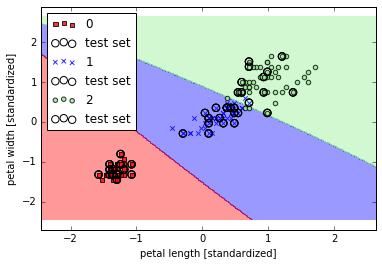

In [32]:
#### IMPORT PYPLOT
import matplotlib.pyplot as plt
%matplotlib inline

### IMPORT SVC (Support Vector Classifier)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0)
svm.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X=X_combined_std,
                     y=y_combined, classifier=svm, 
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show